In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c40c3da1ae7a5ba7d97a74579cca7d7d


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-joseph
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | castillejos
Processing Record 5 of Set 1 | torbay
Processing Record 6 of Set 1 | kegums
Processing Record 7 of Set 1 | sola
Processing Record 8 of Set 1 | nador
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | chicama
Processing Record 12 of Set 1 | esperance
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | yaan
Processing Record 15 of Set 1 | dunedin
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | cherskiy
Processing Record 18 of Set 1 | kinchil
Processing Record 19 of Set 1 | praya
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | talcahuano
Processing Record 22 of Set 1 | 

Processing Record 42 of Set 4 | yinchuan
Processing Record 43 of Set 4 | aswan
Processing Record 44 of Set 4 | provideniya
Processing Record 45 of Set 4 | lagoa
Processing Record 46 of Set 4 | kavieng
Processing Record 47 of Set 4 | hihya
Processing Record 48 of Set 4 | victoria
Processing Record 49 of Set 4 | ilulissat
Processing Record 50 of Set 4 | saquena
Processing Record 1 of Set 5 | fortuna
Processing Record 2 of Set 5 | capitao poco
Processing Record 3 of Set 5 | oum hadjer
Processing Record 4 of Set 5 | logan
Processing Record 5 of Set 5 | barroquinha
Processing Record 6 of Set 5 | mont-dore
Processing Record 7 of Set 5 | moussoro
Processing Record 8 of Set 5 | adrar
Processing Record 9 of Set 5 | smoky lake
Processing Record 10 of Set 5 | ixtapa
Processing Record 11 of Set 5 | ngunguru
Processing Record 12 of Set 5 | ikongo
Processing Record 13 of Set 5 | alugan
Processing Record 14 of Set 5 | tiksi
Processing Record 15 of Set 5 | phan thiet
Processing Record 16 of Set 5 | me

Processing Record 32 of Set 8 | jumla
Processing Record 33 of Set 8 | yishui
Processing Record 34 of Set 8 | shakawe
Processing Record 35 of Set 8 | nome
Processing Record 36 of Set 8 | deputatskiy
Processing Record 37 of Set 8 | jacobabad
Processing Record 38 of Set 8 | luderitz
Processing Record 39 of Set 8 | linguere
Processing Record 40 of Set 8 | richards bay
Processing Record 41 of Set 8 | buchanan
Processing Record 42 of Set 8 | napasar
Processing Record 43 of Set 8 | pointe-noire
Processing Record 44 of Set 8 | ust-nera
Processing Record 45 of Set 8 | kaitangata
Processing Record 46 of Set 8 | namatanai
Processing Record 47 of Set 8 | kokstad
Processing Record 48 of Set 8 | gambela
Processing Record 49 of Set 8 | the valley
Processing Record 50 of Set 8 | moses lake
Processing Record 1 of Set 9 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 9 | dajal
Processing Record 3 of Set 9 | kant
Processing Record 4 of Set 9 | saint-georges
Processing Record 5 of Set 9 |

Processing Record 21 of Set 12 | changzhou
Processing Record 22 of Set 12 | ikom
Processing Record 23 of Set 12 | sungai siput utara
City not found. Skipping...
Processing Record 24 of Set 12 | sorong
Processing Record 25 of Set 12 | quatre cocos
Processing Record 26 of Set 12 | khowst
Processing Record 27 of Set 12 | edd
Processing Record 28 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 29 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 30 of Set 12 | hanzhong
Processing Record 31 of Set 12 | gusinoye ozero
Processing Record 32 of Set 12 | berlevag
Processing Record 33 of Set 12 | urumqi
Processing Record 34 of Set 12 | codajas
Processing Record 35 of Set 12 | talladega
Processing Record 36 of Set 12 | champerico
Processing Record 37 of Set 12 | beloha
Processing Record 38 of Set 12 | tara
Processing Record 39 of Set 12 | maniitsoq
Processing Record 40 of Set 12 | mezen
Processing Record 41 of Set 12 | saint anthony
Processing Record 42 of 

In [10]:
len(city_data)

559

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Joseph,-21.3667,55.6167,84.20,70,52,11.50,RE,2021-04-06 13:08:47
1,Dikson,73.5069,80.5464,0.36,98,18,6.17,RU,2021-04-06 13:08:47
2,Castillejos,14.9333,120.2000,80.60,65,20,5.75,PH,2021-04-06 13:08:48
3,Torbay,47.6666,-52.7314,41.00,100,90,19.57,CA,2021-04-06 13:04:09
4,Kegums,56.7451,24.7244,45.00,42,40,14.97,LV,2021-04-06 13:08:48
5,Sola,-13.8833,167.5500,77.00,100,20,15.32,VU,2021-04-06 13:08:48
6,Nador,35.1740,-2.9287,71.60,68,0,6.91,MA,2021-04-06 13:08:49
7,Ribeira Grande,38.5167,-28.7000,66.20,72,40,18.41,PT,2021-04-06 13:08:49
8,Georgetown,5.4112,100.3354,82.40,83,40,5.75,MY,2021-04-06 13:08:49
9,Chicama,-7.8447,-79.1469,66.20,94,90,9.22,PE,2021-04-06 13:03:58


In [12]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]

city_data_df.head(10)
                

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Joseph,RE,2021-04-06 13:08:47,-21.3667,55.6167,84.20,70,52,11.50
1,Dikson,RU,2021-04-06 13:08:47,73.5069,80.5464,0.36,98,18,6.17
2,Castillejos,PH,2021-04-06 13:08:48,14.9333,120.2000,80.60,65,20,5.75
3,Torbay,CA,2021-04-06 13:04:09,47.6666,-52.7314,41.00,100,90,19.57
4,Kegums,LV,2021-04-06 13:08:48,56.7451,24.7244,45.00,42,40,14.97
5,Sola,VU,2021-04-06 13:08:48,-13.8833,167.5500,77.00,100,20,15.32
6,Nador,MA,2021-04-06 13:08:49,35.1740,-2.9287,71.60,68,0,6.91
7,Ribeira Grande,PT,2021-04-06 13:08:49,38.5167,-28.7000,66.20,72,40,18.41
8,Georgetown,MY,2021-04-06 13:08:49,5.4112,100.3354,82.40,83,40,5.75
9,Chicama,PE,2021-04-06 13:03:58,-7.8447,-79.1469,66.20,94,90,9.22


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

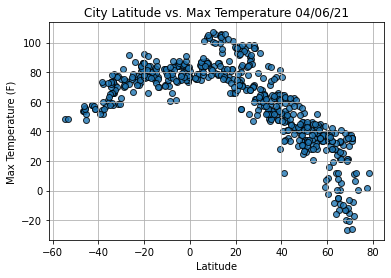

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

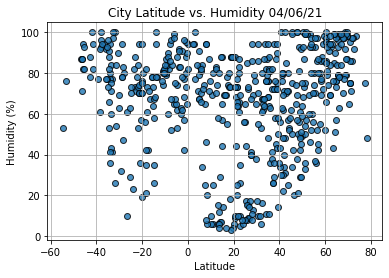

In [16]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()